# Что учить в 2016, чтобы получать REAL CASH

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('bmh')

In [2]:
import string
import re

In [3]:
import random
random.seed(0)
np.random.seed(0)

### Загружаем необработанные данные

In [4]:
data = pd.read_csv('rawdata.csv')

In [5]:
data.head(10)

,_id,_name,_description,_salary
0,18322907,senior php developer,ecommpay it - европейская высокотехнологичная ...,147500
1,18809284,senior frontend developer,русскоязычная команда программистов компании c...,120000
2,18686089,"старший разработчик c#, asp.net mvc",&quot;додо пицца&quot; ищет талантливых разраб...,185000
3,18714668,web-программист,"требования: знание php, javascript, html, c...",45000
4,18774080,разработчик мобильных приложений под android,английский стартап - мобильное приложение для ...,155000
5,18755259,ios разработчик,компания-разработчик социальных и мобильных иг...,225000
6,18755204,системный администратор,"требования к соискателю: высшее образование, ...",65000
7,18714354,php-программист yii,интернет-агентство binn стабильно занимает вед...,70000
8,18773657,разработчик javascript,ищем разработчика на постоянную работу и полны...,90000
9,18553545,senior php developer (high load),"senior high load developer a flexible, full-ti...",150000


In [6]:
data.shape

(1665, 4)

### Смотрим, есть ли дубликаты

In [7]:
data['_id'].value_counts()[:15]

18228451    2
17905074    2
17074307    2
18618443    2
18333259    2
11737110    2
18484451    2
18832487    2
18645383    2
18527003    2
18031441    2
18713913    1
18277732    1
18163046    1
18652521    1
Name: _id, dtype: int64

Они есть. Выбросим их:

In [8]:
data.shape

(1665, 4)

In [9]:
data.drop_duplicates(subset='_id', inplace=True)

In [10]:
data.shape

(1654, 4)

### Составляем список слов, начинающихся с латинской буквы

In [11]:
ss = []
for i in range(data.shape[0]):
    text = data.iloc[i]['_description']
    words = re.split("([^\w#+])", text)
    words = list(filter(lambda x: re.match('^[a-z]', x) is not None, words))
    ss += words
wset = set(ss)

In [12]:
sorted(wset)[:15]

['a',
 'aa',
 'aasm',
 'ab',
 'abap',
 'abbyy',
 'ability',
 'able',
 'about',
 'above',
 'abroad',
 'acca',
 'acceptance',
 'access',
 'account']

### Выбираем те, которые нам интересны

In [13]:
markers = ('python;perl;php;html;css;javascript;jquery;angular;react;scala;c++;c#;ruby;matlab;lisp;excel;office;'
                'linux;windows;git;mercury;hadoop;spark;big data;oracle;microsoft;apache;google;facebook;apple;web;'
                  'sql;android;ios;frontend;backend;gui;mobile;numpy;pandas;sklearn;svm;machine learning;'
                  'wordpress;xml;delphi;1с;rails;django')
markers = list(set(markers.split(';')))

In [14]:
for m in markers:
    data[m] = data['_description'].apply(lambda x: m in x)*1

In [15]:
data.head(3)

,_id,_name,_description,_salary,sql,mobile,scala,machine learning,android,windows,...,frontend,python,facebook,c++,perl,backend,sklearn,mercury,git,spark
0,18322907,senior php developer,ecommpay it - европейская высокотехнологичная ...,147500,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,18809284,senior frontend developer,русскоязычная команда программистов компании c...,120000,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,18686089,"старший разработчик c#, asp.net mvc",&quot;додо пицца&quot; ищет талантливых разраб...,185000,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Строим гистограмму зарплат
Для всех вакансий из выборки

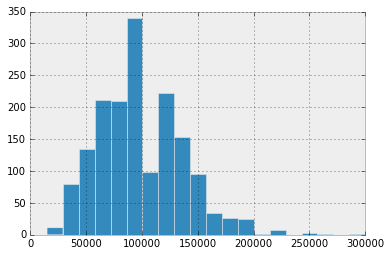

In [16]:
plt.hist(data['_salary'], bins=20);

In [17]:
data['_salary'].describe()

count      1654.000000
mean      99416.750907
std       38056.300679
min       15000.000000
25%       70000.000000
50%      100000.000000
75%      120000.000000
max      300000.000000
Name: _salary, dtype: float64

### Удаляем редкие маркеры
Удалим маркеры, которые есть меньше чем в 5 вакансиях, чтобы не строить статистику совсем уж по двум точкам

In [18]:
markers = list(filter(lambda x: data[data[x]>0].shape[0] >= 5, markers))

Оставим только колонки с выбранными маркерами и техническими данными

In [19]:
data=data[['_id', '_name', '_description', '_salary']+markers]

### Построим таблицу с выводами

In [20]:
rows = []
j = 0
for m in markers:
    salaries = data[data[m]>0]['_salary']
    data_row={'marker': m, 'median_salary': int(salaries.median()), 'big_salary': int(salaries.quantile(0.9)),
             'std_salary_percent': int(100*salaries.std()/salaries.mean()),
             'n_vacancies': len(salaries)}
    rows.append(pd.DataFrame(data_row, index=[j]))
    j += 1
results = pd.concat(rows)[['marker', 'n_vacancies', 'median_salary', 'big_salary', 'std_salary_percent']]

In [21]:
results.sort_values(by='median_salary', ascending=False)

,marker,n_vacancies,median_salary,big_salary,std_salary_percent
2,scala,21,150000,200000,27
32,big data,6,146250,200000,34
16,apple,18,142500,195500,25
9,hadoop,9,140000,200000,24
23,react,102,120000,150000,22
3,android,99,120000,170000,34
39,backend,53,120000,150000,33
6,ios,96,120000,182500,33
37,c++,101,110000,170000,37
22,angular,130,110000,150000,27


### Построим пару гистограмм

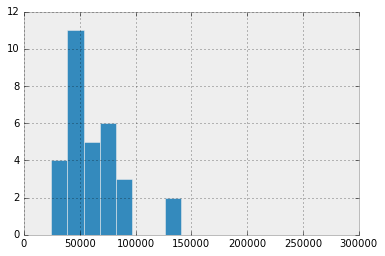

In [22]:
plt.hist(data[data['wordpress']>0]['_salary'], bins=20, range=(10000,300000));

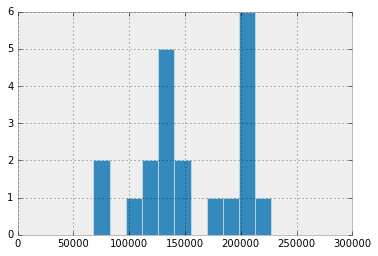

In [23]:
plt.hist(data[data['scala']>0]['_salary'], bins=20, range=(10000,300000));

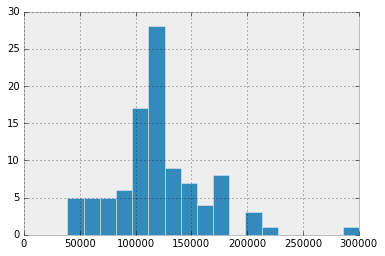

In [24]:
plt.hist(data[data['android']>0]['_salary'], bins=20, range=(10000,300000));

### Запишем данные

In [25]:
results.to_csv(path_or_buf='report.csv', index=False)